# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [ ]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

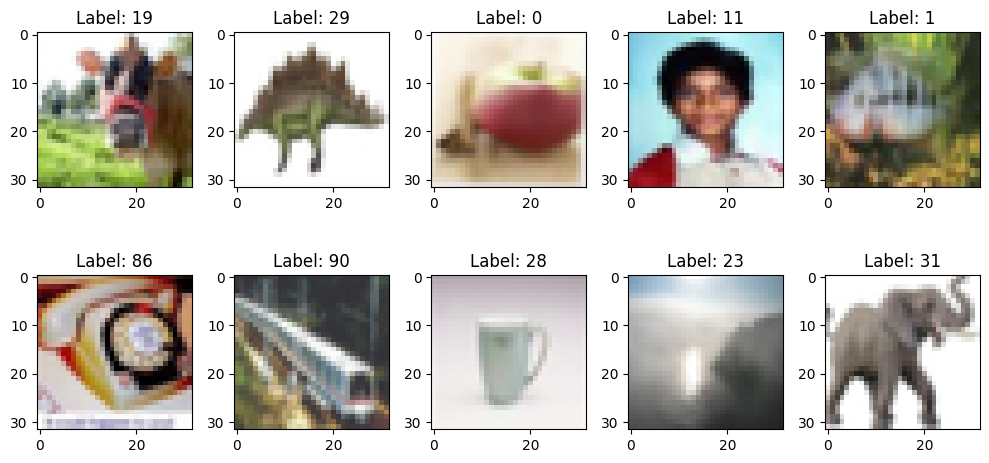

In [ ]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

# Display some images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')
    ax.axis('on')

plt.tight_layout()
plt.show()

sample image shape:  (32, 32, 3)


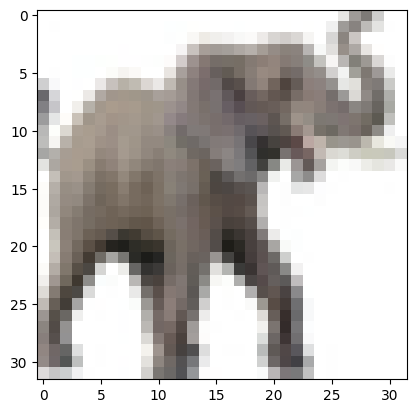

In [ ]:
sample_image = x_train[i]
shape=sample_image.shape

print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'))

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
from numpy import array

K = len(np.unique(y_train))
print (K)

100


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [ ]:
# Your code here
# normalise pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# onehot the label values
from tensorflow.keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)
print(f'After one-hot encoding: {y_train[0]}')

Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_validation, y_train, y_validation  = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_validation shape: {X_validation.shape}')
print(f'y_validation shape: {y_validation.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 100)
X_validation shape: (10000, 32, 32, 3)
y_validation shape: (10000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout, BatchNormalization, GlobalMaxPooling2D


In [ ]:
# Your code here
model = Sequential()

model.add(Input(shape=X_train[0].shape))
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", strides=2))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))



In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 15, 15, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         156,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,924 (616.89 KB)

 Trainable params: 157,860 (616.64 KB)

 Non-trainable params: 64 (256.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> _categorical crossentropy is a commonly used loss function for multi class classification problems_____
- <b>Optimizer:</b> __'Adam' is a gradient descent type optimizer that converges fast and is robust to poor hyperparameters____

In [ ]:
from keras import optimizers

# Your code here
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

model accuracy and validaiton accuracy both follow each other closely. The accuracy seems to dip after 15 epochs but rises again around 25 epochs.

Early Stopping callback is be incorporated into model fitting to automatically stop training when the optimum number of epochs has been reached. The call back shows sudden drop in model accuracy after 13 epochs and the training stops after 16 epochs, so the model was trained again with 13 epochs only.

In [ ]:
# # Your code here
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)
history = model.fit(X_train,y_train,
                    batch_size=32,
                    epochs= 13,
                    validation_data=(X_validation, y_validation),
                   #callbacks=earlystopping
                   )

Epoch 1/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.0580 - loss: 8.0366 - val_accuracy: 0.1018 - val_loss: 4.7421
Epoch 2/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.0977 - loss: 4.6752 - val_accuracy: 0.0556 - val_loss: 5.7433
Epoch 3/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.1019 - loss: 4.3510 - val_accuracy: 0.0651 - val_loss: 5.5025
Epoch 4/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.1230 - loss: 4.2768 - val_accuracy: 0.0335 - val_loss: 5.4758
Epoch 5/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1144 - loss: 4.2147 - val_accuracy: 0.0508 - val_loss: 7.8036
Epoch 6/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.0990 - loss: 4.2678 - val_accuracy: 0.0916 - val_loss: 4.4079
Epoch 7/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.1368 - loss: 4.1339 - val_accuracy: 0.1240 - val_loss: 4.3114
Epoch 8/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.1505 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> __0.1957___
- <b>Other metric:</b> ___precision score___
- <b>Reason for selection:</b> _ calculates the proportion of the observations, predicted by the model as positive, that are actual positives____
- <b>Value of metric:</b> _0.1735_____
- <b>Interpretation of metric value:</b> __only 17% of the predicted positive labels were actually positive in the classification____

In [ ]:
# Your code here
from sklearn import metrics
y_pred = model.predict(x_test)
y_preds=np.argmax(y_pred, axis=1)
y_tests=np.argmax(y_test, axis=1)

accumetrics = metrics.precision_score(y_tests, y_preds,
                                      average='micro')
print(accumetrics)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
0.01


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

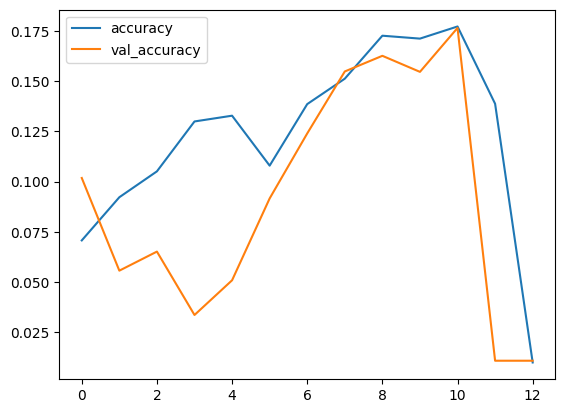

In [ ]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [ ]:
#get the model's prediciton on the test set
y_pred = model.predict(x_test)

#find the indices of the samples where the model's prediction was wrong
wrong_indices = np.where(y_pred != y_test)[0]
right_indices = np.where(y_pred == y_test)[0]



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
print(wrong_indices)

[   0    0    0 ... 9999 9999 9999]


In [ ]:
fine_labels = [
    'apple',  # id 0
    'aquarium_fish',
    'baby',
    'bear',
    'beaver',
    'bed',
    'bee',
    'beetle',
    'bicycle',
    'bottle',
    'bowl',
    'boy',
    'bridge',
    'bus',
    'butterfly',
    'camel',
    'can',
    'castle',
    'caterpillar',
    'cattle',
    'chair',
    'chimpanzee',
    'clock',
    'cloud',
    'cockroach',
    'couch',
    'crab',
    'crocodile',
    'cup',
    'dinosaur',
    'dolphin',
    'elephant',
    'flatfish',
    'forest',
    'fox',
    'girl',
    'hamster',
    'house',
    'kangaroo',
    'computer_keyboard',
    'lamp',
    'lawn_mower',
    'leopard',
    'lion',
    'lizard',
    'lobster',
    'man',
    'maple_tree',
    'motorcycle',
    'mountain',
    'mouse',
    'mushroom',
    'oak_tree',
    'orange',
    'orchid',
    'otter',
    'palm_tree',
    'pear',
    'pickup_truck',
    'pine_tree',
    'plain',
    'plate',
    'poppy',
    'porcupine',
    'possum',
    'rabbit',
    'raccoon',
    'ray',
    'road',
    'rocket',
    'rose',
    'sea',
    'seal',
    'shark',
    'shrew',
    'skunk',
    'skyscraper',
    'snail',
    'snake',
    'spider',
    'squirrel',
    'streetcar',
    'sunflower',
    'sweet_pepper',
    'table',
    'tank',
    'telephone',
    'television',
    'tiger',
    'tractor',
    'train',
    'trout',
    'tulip',
    'turtle',
    'wardrobe',
    'whale',
    'willow_tree',
    'wolf',
    'woman',
    'worm',
]
def print_fine_labels():
    for id, label in enumerate(fine_labels):
        print(id, " ", label)

In [ ]:
# def plot_prediction(model, sample_idx=0, classes=range(10)):
#     fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#     print(x_test[sample_idx])
#     ax0.imshow((x_test[sample_idx]).reshape(32,32),
#                cmap=plt.cm.gray_r, interpolation='nearest')
#     ax0.set_title("True image label: %d" % y_test[sample_idx])


#     ax1.bar(classes, one_hot(len(classes), y_test[sample_idx]), label='true')
#     ax1.bar(classes, (x_test[sample_idx]), label='prediction', color="red")
#     ax1.set_xticks(classes)
#     prediction = model.predict(x_test[sample_idx])
#     ax1.set_title('Output probabilities (prediction: %d)'
#                   % prediction)
#     ax1.set_xlabel('Digit class')
#     ax1.legend()

# plot_prediction(model, sample_idx=0)

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
'''More layers (dense, convolution and pooling layers) were added - having more layers improves the model's ability to learn more
complex and non-linear relationships in the data

added 2 dropout layers to the neural network - to randomly nullify neurons (20%) to prevent overfitting to the training data and make the model
predicitions generelizable to unseen data


'''

"More layers (dense, convolution and pooling layers) were added - having more layers improves the model's ability to learn more \ncomplex and non-linear relationships in the data\n\nadded 2 dropout layers to the neural network - to randomly nullify neurons (20%) to prevent overfitting to the training data and make the model\npredicitions generelizable to unseen data\n\n\n"

In [ ]:

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model2 = Model(i, x)

# model description
model2.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,364,164 (16.65 MB)

 Trainable params: 4,363,780 (16.65 MB)

 Non-trainable params: 384 (1.50 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
# Your code here
# Compile
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
# Fit
#callback "early stopping" is used during training to automatically halt trianing when there is no further improvement to the model accuracy

r = model2.fit(X_train,y_train,
                    batch_size=32,
                    epochs= 13,
                    validation_data=(X_validation, y_validation),
                    #callbacks=earlystopping
                   )

Epoch 1/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 324s 256ms/step - accuracy: 0.1042 - loss: 4.2943 - val_accuracy: 0.2198 - val_loss: 3.2135
Epoch 2/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 324s 258ms/step - accuracy: 0.2599 - loss: 3.0083 - val_accuracy: 0.2962 - val_loss: 2.8421
Epoch 3/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 327s 261ms/step - accuracy: 0.3556 - loss: 2.5083 - val_accuracy: 0.3695 - val_loss: 2.4593
Epoch 4/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 380s 260ms/step - accuracy: 0.4342 - loss: 2.1437 - val_accuracy: 0.3968 - val_loss: 2.3859
Epoch 5/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 330s 264ms/step - accuracy: 0.4955 - loss: 1.8473 - val_accuracy: 0.4247 - val_loss: 2.2187
Epoch 6/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 320s 256ms/step - accuracy: 0.5793 - loss: 1.5064 - val_accuracy: 0.4080 - val_loss: 2.4567
Epoch 7/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 317s 252ms/step - accuracy: 0.6528 - loss: 1.2093 - val_accuracy: 0.4259 - val_loss: 2.3695
Epoch 8/13
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 335s 263ms/step - ac

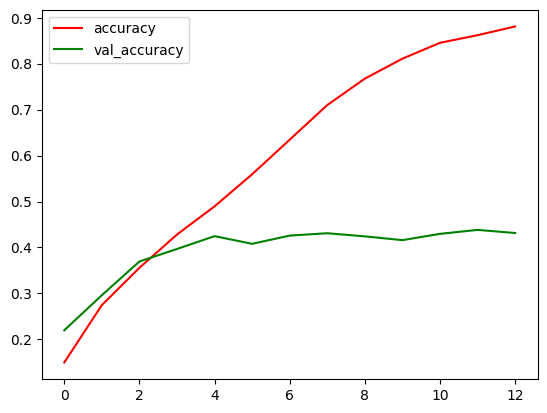

In [ ]:
#accuracy plot by epoch
plt.plot(r.history['accuracy'], label='accuracy', color='red')
plt.plot(r.history['val_accuracy'], label='val_accuracy', color='green')
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Original label is mountain and predicted label is road


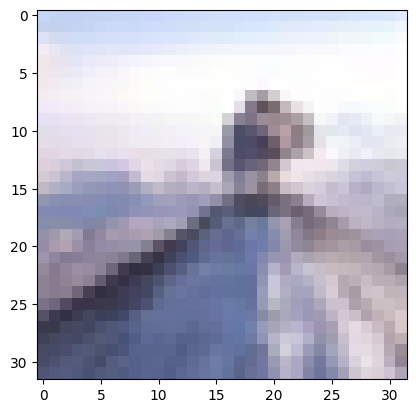

In [ ]:

# select the image from our test dataset
image_number = 0

plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = fine_labels[model2.predict(p).argmax()]

original_label = fine_labels[y_test[image_number].argmax()]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [ ]:
y_pred2 = model2.predict(x_test)

#find the indices of the samples where the model's prediction was wrong
wrong_indices2 = np.where(y_pred2 != y_test)[0]
right_indices2 = np.where(y_pred2 == y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step


In [ ]:
wrong_indices2

array([   0,    0,    0, ..., 9999, 9999, 9999])

In [ ]:
right_indices2

array([ 378, 1706, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3347,
       3347, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3347, 3347,
       3873, 3873, 3873, 3873, 3873, 3873, 3873, 4800, 8300])

In [ ]:

plt.imshow(wrong_indices2[image_number])

# load the image in an array
n = np.array(wrong_indices2[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = fine_labels[model2.predict(p).argmax()]

original_label = fine_labels[y_test[image_number].argmax()]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

In [ ]:

plt.imshow(right_indices2[image_number])

# load the image in an array
n = np.array(right_indices2[image_number])

p = n.reshape(1, 32, 32, 3)

predicted_label = fine_labels[model2.predict(p).argmax()]

original_label = fine_labels[y_test[image_number].argmax()]

print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

while the accuracy improved signifcantly with the new model, it still failed to predict a single image correctly, seeing as the right_indices_2 list is empty! this could be a result of the model hyperparameters not being selected optimally for the data type we are trying to get it to learn.

Perhaps the model could be improved further by data augmentation (flipping the images horizontally/anticlockwise and further training the model), and by optimizing the hyperparameters, for example via bayesian hyperparameter optimisation. The activation functions and various layers could also be changed and tuned better to assist the model with better learning and predictions



## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.